#Evalutaing Patient Readmission Risk


---

Group 10:

#1 - Business Problem Definition + Brief Description of data and its source

For reputations and financial reasons, hopistals tend to avoid readmissions.


Readmission is a healthcare metric that tracks patients who are re-admitted to a hospital within 30 days. This is gnerally avoided at hospitals' and patients' interests due to many complications, such as reduced coverage during readmissions from insurances like Medicare, which causes financial issues for hopitals and patients themselves (2012).


Hence, the business problem for US hospital here is that hospitals are losing money and credibility by having readmissions. We believe through analyzing the most prominent groups of readmitted patients, we can lower the readmission rates through preventions.

-----


Through the data from Clinical and Translational Research, Virginia Commonwealth University, we're able to explore 10 years (1999-2008) of clinical care data at 130 US hospitals and integrated delivery networks. This data set includes information of diabetic inpatient encounters ranges from 1 to 14 days, and if the encountered patients is readmitted (No, > 30 days, < 30days).


There are 55 variables and 100k instances, including some with missing values. The variables can generally be divided into four portions:

      - Demographic/basic information:
          - encounter_id
          - patient_nbr
          - race
          - gender
          - age
          - weight
      
      - Diagnosis:
          - admission_type_id
          - discharge_disposition_id
          - admission_source_id
          - time_in_hospital
          - payer_code
          - medical_specialty
          - num_lab_procedures
          - num_procedures
          - num_medications
          - number_outpatient
          - number_emergency
          - number_inpatient
          - diag_1
          - diag_2
          - diag_3
          - number_diagnoses
          - max_glu_serum
          - A1Cresult

       - Diabetic Medications:
          - metformin
          - repaglinide
          - nateglinide
          - chlorpropamide
          - glimepiride
          - acetohexamide
          - glipizide
          - glyburide
          - tolbutamide
          - pioglitazone
          - rosiglitazone
          - acarbose
          - miglitol
          - troglitazone
          - tolazamide
          - examide
          - citoglipton
          - insulin
          - glyburide-metformin
          - glipizide-metformin
          - glimepiride-pioglitazone
          - metformin-rosiglitazone
          - metformin-pioglitazone
          - change
          - diabetesMed
        
       - Readmission:
          - readmitted
  
By looking into how the demographic, diabetic diagnosis and diabetic medication histories can affect patients' readmission type, we hope to provide a business solution for hospitals to prevent key readmitted populations from premature discharges and more careful inpatient treatments upon diagnosis.

**Reference List:**
- *Hospital Readmissions*. (2012). Agency for Healthcare Research and Quality. Retrieved September 30, 2023 from https://www.ahrq.gov/topics/hospital-readmissions.html

##1.2 - Notes on how to use this notebook:


*   The full dataset was downloaded as assigned to the variable `df`
*   The cleaned version of the dataset, used in the initial exploratory analysis was assgined to `df_clean`



#2 - Loading the inital dataset and required libraries:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Initial dataset:
df = pd.read_csv('https://raw.githubusercontent.com/eshentong/BA780-team10-project/main/readmission.csv')

#Create dataset copy to be cleaned
df_clean = df.copy()

#3 - Data Cleaning and Transformation:

##3.0 - Note:

When listing all the columns for the initial dataset, `df.info()` returns that are no null values in any of the columns. However, after the inital data cleaning and exploration of the data we found that many columns had a significant number of missing values, the were only marked with different types of symbols, the most common being `'?'`

In [3]:
#List of all initial variables:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

##3.1- `encounter_id`


---

Unique identifier for the encounter

*   Set as index





In [4]:
#Set the encounter_id as the index for the dataset
df_clean.set_index('encounter_id', inplace=True)

##3.1- `patient_nbr`


---

Unique identifier of the patient

In [5]:
df['patient_nbr'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 101766 entries, 0 to 101765
Series name: patient_nbr
Non-Null Count   Dtype
--------------   -----
101766 non-null  int64
dtypes: int64(1)
memory usage: 795.2 KB


## 3.1- `race`


---

Patient's race

* There are 2273 (2%) values missing
* Keep the variable, but replace `'?'` entries with `None`

In [6]:
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [7]:
#Missing values:
len(df['race'][df['race'] == '?']), (len(df['race'][df['race'] == '?'])/len(df))*100

(2273, 2.2335554114340743)

In [8]:
#Replace the '?' result with None
race_map = {'?':None}

df_clean['race'].replace(race_map, inplace=True)

##3.1- `gender`


---

Patient's gender (Male/Female)

* There are only 3 (0.003%) values missing

In [9]:
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [10]:
#Missing values:
len(df['gender'][df['gender'] == 'Unknown/Invalid']), (len(df['gender'][df['gender'] == 'Unknown/Invalid'])/len(df))*100

(3, 0.002947939390366134)

In [11]:
#Create map:
gender_map = {'Male':0, 'Female':1, 'Unknown/Invalid':None}

#Apply maeo:
df_clean['gender'].replace(gender_map, inplace=True)

##3.1- `age`


---

Age grouped in 10-year intervals

* No missing values
* Ready to use

In [12]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [13]:
df['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

##3.1- `weight`


---

Weight in pounds

* There are 98,569 (97%) values missing
* Drop column due to high % of values missing


In [14]:
df['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [15]:
#Missing values:
len(df['weight'][df['weight'] == '?']), (len(df['weight'][df['weight'] == '?'])/len(df))*100

(98569, 96.85847925633315)

In [16]:
#Drop weight due to large missing values
df_clean.drop(labels='weight', axis=1, inplace=True)

##3.2- `admission_type_id` PLACEHOLDER


---

Integer identifier that corresponds to different types of admission (see below)

Mapping:

1 -	Emergency

2 -	Urgent

3 - Elective

4 -	Newborn

5 -	Not Available

6 - NULL

7 -	Trauma Center

8 - Not Mapped


In [17]:
df['admission_type_id'].unique()

array([6, 1, 2, 3, 4, 5, 8, 7])

##3.2- `discharge_disposition_id` PLACEHOLDER


---

Integer identifier that corresponds to different types of discharge conditions (see below)


Mapping:

1	Discharged to home

2	Discharged/transferred to another short term hospital

3	Discharged/transferred to SNF

4	Discharged/transferred to ICF

5	Discharged/transferred to another type of inpatient care institution

6	Discharged/transferred to home with home health service

7	Left AMA

8	Discharged/transferred to home under care of Home IV provider

9	Admitted as an inpatient to this hospital

10	Neonate discharged to another hospital for neonatal aftercare

11	Expired

12	Still patient or expected to return for outpatient services

13	Hospice / home

14	Hospice / medical facility

15	Discharged/transferred within this institution to Medicare approved swing bed

16	Discharged/transferred/referred another institution for outpatient services

17	Discharged/transferred/referred to this institution for outpatient services

18	NULL

19	Expired at home. Medicaid only, hospice.

20	Expired in a medical facility. Medicaid only, hospice.

21	Expired, place unknown. Medicaid only, hospice.

22	Discharged/transferred to another rehab fac including rehab units of a hospital .

23	Discharged/transferred to a long term care hospital.

24	Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.

25	Not Mapped

26	Unknown/Invalid

30	Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere

27	Discharged/transferred to a federal health care facility.

28	Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital

29	Discharged/transferred to a Critical Access Hospital (CAH).


##3.2- `admission_source_id` PLACEHOLDER


---



##3.2- `time_in_hospital`

---

Number of days between admission and discharge (int64)

*   min = 1; max = 14
*   No missing values
*   Ready to use

In [18]:
#Display all unique values for 'time_in_hospital':
df['time_in_hospital'].unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14])

In [19]:
#Min, max, and sum of all null values:
df['time_in_hospital'].describe(), df['time_in_hospital'].isnull().sum()

(count    101766.000000
 mean          4.395987
 std           2.985108
 min           1.000000
 25%           2.000000
 50%           4.000000
 75%           6.000000
 max          14.000000
 Name: time_in_hospital, dtype: float64,
 0)

##3.2- `payer_code`


---

Unique identifier (key) that indicates who is paying (object). Includes self-pay

*   Missing values are noted as '?'
*   There are 40,256 missing values. (40%)
*   Drop the column due to the high % of missing values











In [20]:
df['payer_code'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 101766 entries, 0 to 101765
Series name: payer_code
Non-Null Count   Dtype 
--------------   ----- 
101766 non-null  object
dtypes: object(1)
memory usage: 795.2+ KB


In [21]:
#Display all unique values for 'time_in_hospital':
df['payer_code'].unique() #Note: '?' is a null value

array(['?', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [22]:
#Missing values:
len(df['payer_code'][df['payer_code'] == '?']), (len(df['payer_code'][df['payer_code'] == '?'])/len(df))*100

(40256, 39.5574160328597)

In [23]:
#Drop 'prayer_code' column
df_clean.drop('payer_code', axis=1, inplace=True)

##3.2- `medical_specialty`


---

Specialty of the admitting doc (object)

*   Missing values are noted as '?'
*   There are 40,256 missing values. (49%)
*   Drop the column due to the high % of missing values



In [24]:
df['medical_specialty'].unique()

array(['Pediatrics-Endocrinology', '?', 'InternalMedicine',
       'Family/GeneralPractice', 'Cardiology', 'Surgery-General',
       'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Surgery-Colon&Rectal', 'Pediatrics-CriticalCare', 'Endocrinology',
       'Urology', 'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Psychology', 'Podiatry',
       'Gynecology', 'Oncology', 'Pediatrics-Neurology',
       'Surgery-Plastic', 'Surgery-Thoracic',
       'Surgery-PlasticwithinHeadandNeck', 'Ophthalmology',
       'Surgery-Pediatric', 'Pediatrics-EmergencyMedicine',
       'PhysicalMedicineandRe

In [25]:
#Missing values:
len(df['medical_specialty'][df['medical_specialty'] == '?']), len(df['medical_specialty'][df['medical_specialty'] == '?'])/len(df)

(49949, 0.49082208203132677)

In [26]:
#Drop 'medical_specialty' column:
df_clean.drop('medical_specialty', axis=1, inplace=True)

##3.2- `num_lab_procedures`


---

Number of lab tests performed during stay (int64)


*   min = 1; max = 132
*   No missing values
*   Ready to use




In [27]:
df['num_lab_procedures'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 101766 entries, 0 to 101765
Series name: num_lab_procedures
Non-Null Count   Dtype
--------------   -----
101766 non-null  int64
dtypes: int64(1)
memory usage: 795.2 KB


In [28]:
df['num_lab_procedures'].unique()

array([ 41,  59,  11,  44,  51,  31,  70,  73,  68,  33,  47,  62,  60,
        55,  49,  75,  45,  29,  35,  42,  66,  36,  19,  64,  25,  53,
        52,  87,  27,  37,  46,  28,  48,  72,  10,   2,  65,  67,  40,
        54,  58,  57,  43,  32,  83,  34,  39,  69,  38,  56,  22,  96,
        78,  61,  88,  50,   1,  18,  82,   9,  63,  24,  71,  77,  81,
        76,  90,  93,   3, 103,  13,  80,  85,  16,  15,  12,  30,  23,
        17,  21,  79,  26,   5,  95,  97,  84,  14,  74, 105,  86,  98,
        20,   6,  94,   8, 102, 100,   7,  89,  91,  92,   4, 101,  99,
       114, 113, 111, 129, 107, 108, 106, 104, 109, 120, 132, 121, 126,
       118])

In [29]:
df['num_lab_procedures'].describe(), 'Missing values: ' + str(df['num_lab_procedures'].isnull().sum())

(count    101766.000000
 mean         43.095641
 std          19.674362
 min           1.000000
 25%          31.000000
 50%          44.000000
 75%          57.000000
 max         132.000000
 Name: num_lab_procedures, dtype: float64,
 'Missing values: 0')

##3.2- `num_medications`


---

Number of distinct generic meds given during stay (int64)

*   min = 1; max = 81
*   No missing values
*   Ready to used






In [30]:
df['num_medications'].unique()

array([ 1, 18, 13, 16,  8, 21, 12, 28, 17, 11, 15, 31,  2, 23, 19,  7, 20,
       14, 10, 22,  9, 27, 25,  4, 32,  6, 30, 26, 24, 33,  5, 39,  3, 29,
       61, 40, 46, 41, 36, 34, 35, 50, 43, 42, 37, 51, 38, 45, 54, 52, 49,
       62, 55, 47, 44, 53, 48, 57, 59, 56, 60, 63, 58, 70, 67, 64, 69, 65,
       68, 66, 81, 79, 75, 72, 74])

In [31]:
df['num_medications'].describe(), 'Missing values: ' + str(df['num_medications'].isnull().sum())

(count    101766.000000
 mean         16.021844
 std           8.127566
 min           1.000000
 25%          10.000000
 50%          15.000000
 75%          20.000000
 max          81.000000
 Name: num_medications, dtype: float64,
 'Missing values: 0')

##3.2- `number_outpatient`

---

Number of outpatient(service/treatment that does not require hospitalization) visits the patient had in the year preceding the stay (int64)

*   min = 0; max = 42
*   No missing values
*   Ready to use







In [32]:
df['number_outpatient'].unique()

array([ 0,  2,  1,  5,  7,  9,  3,  8,  4, 12, 11,  6, 20, 15, 10, 13, 14,
       16, 21, 35, 17, 29, 36, 18, 19, 27, 22, 24, 42, 39, 34, 26, 33, 25,
       23, 28, 37, 38, 40])

In [33]:
df['number_outpatient'].describe(), 'Missing values: ' + str(df['number_outpatient'].isnull().sum())

(count    101766.000000
 mean          0.369357
 std           1.267265
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max          42.000000
 Name: number_outpatient, dtype: float64,
 'Missing values: 0')

##3.2- `number_emergency`


---

Number of emergency visits of the patient preceding the stay (int64)

*   min = 0; max = 76
*   No missing values
*   Ready to use!




In [34]:
df['number_emergency'].unique()

array([ 0,  1,  2,  4,  3,  9,  5,  7,  6,  8, 22, 25, 10, 13, 42, 16, 11,
       28, 15, 14, 18, 12, 21, 20, 19, 46, 76, 37, 64, 63, 54, 24, 29])

In [35]:
df['number_emergency'].describe(), 'Missing values: ' + str(df['number_emergency'].isnull().sum())

(count    101766.000000
 mean          0.197836
 std           0.930472
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           0.000000
 max          76.000000
 Name: number_emergency, dtype: float64,
 'Missing values: 0')

##3.2- `number_inpatient`


---

Number of inpatient visits (required hospitalization) in the year preceding the stay (int64)


*   min = 0; max = 21
*   No missing values
*   Ready to use!







In [36]:
df['number_inpatient'].unique()

array([ 0,  1,  2,  3,  6,  5,  4,  7,  8,  9, 15, 10, 11, 14, 12, 13, 17,
       16, 21, 18, 19])

In [37]:
df['number_inpatient'].describe(), 'Missing values: ' + str(df['number_inpatient'].isnull().sum())

(count    101766.000000
 mean          0.635566
 std           1.262863
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           1.000000
 max          21.000000
 Name: number_inpatient, dtype: float64,
 'Missing values: 0')

##

##3.2- `diag_1, diag_2, diag_3`


---

the primary and two secondary diagnosis of each patient. Due to the high number of possible diagnosis, we first group them into higher level diseases groups. (ADD SOURCE OF GROUPING METHOD)



In [38]:
#Group diagnosis into higher level groups:

# http://www.icd9data.com/2008/Volume1/default.htm
def diag_to_cat(value):
    if 'V' in value:
        return 'Supplementary Classification Of Factors Influencing Health Status And Contact With Health Services'
    elif 'E' in value:
        return 'Supplementary Classification Of External Causes Of Injury And Poisoning'
    elif '?' in value:
        return None
    value = float(value)
    value = int(value)
    if value in range(1, 140):
        return 'Infectious And Parasitic Diseases'
    elif value in range(140, 240):
        return 'Neoplasms'
    elif value in range(240, 280):
        return 'Endocrine, Nutritional And Metabolic Diseases, And Immunity Disorders'
    elif value in range(280, 290):
        return 'Diseases Of The Blood And Blood-Forming Organs'
    elif value in range(290, 320):
        return 'Mental Disorders'
    elif value in range(320, 390):
        return 'Diseases Of The Nervous System And Sense Organs'
    elif value in range(390, 460):
        return 'Diseases Of The Circulatory System'
    elif value in range(460, 520):
        return 'Diseases Of The Respiratory System'
    elif value in range(520, 580):
        return 'Diseases Of The Digestive System'
    elif value in range(580, 630):
        return 'Diseases Of The Genitourinary System'
    elif value in range(630, 680):
        return 'Complications Of Pregnancy, Childbirth, And The Puerperium'
    elif value in range(680, 710):
        return 'Diseases Of The Skin And Subcutaneous Tissue'
    elif value in range(710, 740):
        return 'Diseases Of The Musculoskeletal System And Connective Tissue'
    elif value in range(740, 760):
        return 'Congential Anomalies'
    elif value in range(760, 780):
        return 'Certain Conditions Originating In The Perinatal Period'
    elif value in range(780, 800):
        return 'Symptoms, Signs, And Ill-Defined Conditions'
    elif value in range(800, 1000):
        return 'Injury And Poisoning'
    else:
        return 'Not in Dictionary'



In [39]:
#Create new columns for the higher level disease groups:
df_clean['diag_1_cat'] = df_clean['diag_1'].apply(diag_to_cat)
df_clean['diag_2_cat'] = df_clean['diag_2'].apply(diag_to_cat)
df_clean['diag_3_cat'] = df_clean['diag_3'].apply(diag_to_cat)

#Drop old columns:
df_clean = df_clean.drop(columns= ['diag_1', 'diag_2', 'diag_3'])


##3.2- `number_diagnoses`


---



In [40]:
df['number_diagnoses'].unique()

array([ 1,  9,  6,  7,  5,  8,  3,  4,  2, 16, 12, 13, 15, 10, 11, 14])

In [41]:
df['number_diagnoses'].describe(), 'Missing values: ' + str(df['number_diagnoses'].isnull().sum())

(count    101766.000000
 mean          7.422607
 std           1.933600
 min           1.000000
 25%           6.000000
 50%           8.000000
 75%           9.000000
 max          16.000000
 Name: number_diagnoses, dtype: float64,
 'Missing values: 0')

##3.2- `max_glu_serum, A1Cresult`

---

PLACEHOLDER (What did we decide for all the null values with here?)

In [42]:
df['max_glu_serum'].unique(), df['A1Cresult'].unique()

(array(['None', '>300', 'Norm', '>200'], dtype=object),
 array(['None', '>7', '>8', 'Norm'], dtype=object))

Mapping lab results into normal (0), abnormal (1), and null (None):

In [43]:
#Create map:
glu_serum_test_mapping = {'>300':1, '>200':1, 'Norm':0, 'None':None}
A1C_test_mapping = {'>8':1, '>7':1, 'Norm':0, 'None':None}

#Replace old values with map:
df_clean['max_glu_serum'] = df_clean['max_glu_serum'].replace(glu_serum_test_mapping)
df_clean['A1Cresult'] = df_clean['A1Cresult'].replace(A1C_test_mapping)

df_clean['max_glu_serum'].isnull().sum(), df_clean['A1Cresult'].isnull().sum()

(96420, 84748)

## 3.3- Prescriptions


---

List: `metformin`, `repaglinide`, `nateglinide`, `chlorpropamide`, `glimepiride`, `acetohexamide`, `glipizide`, `glyburide`, `tolbutamide`, `pioglitazone`, `rosiglitazone`, `acarbose`, `miglitol`, `troglitazone`, `tolazamide`, `examide`, `citoglipton`, `insulin`, `glyburide-metformin`, `glipizide-metformin`, `glimepiride-pioglitazone`, `metformin-rosiglitazone`, `metformin-pioglitazone`

* For the prescriptions in the dataset, we applied a similar cleaning strategy. All mediactions had no missing values, and the following unique values: `'No'`, `'Steady'`, `'Down'`, `'Up'`. For our analysis, we decided to convert 'No' values into `0`, and `'Steady'`, `'Down'`, and `'Up'` into` 1`

* To concentrate on the most frequently prescribed medications, we opted to exclude columns representing medications taken by less than 0.1% of the patients.

* The folliwing medicstions did not meet this criteria and were dropped: PLACEHOLDER


In [44]:
#Mapping Prescriptions to yes(1) or no(0) prescription:
prescription_mapping = {'Down':1, 'Up':1, 'Steady':1, 'No':0}

#Create list of columns with the prescription to be transformed:
prescription_list = list(df.loc[:,'metformin': 'metformin-pioglitazone'].columns)

#Apply map:
for prescription in prescription_list:

  df_clean[prescription] = df_clean[prescription].replace(prescription_mapping)

In [45]:
#creating a column that sums up the number of diabetic meds taken before dropping insignificant columns

df_clean['num_diabetic_med']= df_clean.loc[ :, 'metformin' : 'metformin-pioglitazone'].sum(axis=1)
df_clean['num_diabetic_med'].astype(int)

encounter_id
2278392      0
149190       1
64410        1
500364       1
16680        2
            ..
443847548    2
443847782    1
443854148    2
443857166    3
443867222    0
Name: num_diabetic_med, Length: 101766, dtype: int64

In [46]:
#Calculate the % of patients taking each medication:

#Start a list of lists to hold the medication name and its % use
med_avg = [[],[]]

#Calculate % use and append to list
for i in df_clean[prescription_list].columns:

  med_avg[0].append(i)
  med_avg[1].append((df_clean[i].sum()/len(df_clean[i])))

med_avg

#Create a better format for the output
print('Prescriptions and their % use in the dataset:', '\n')
for i, percentage in zip(med_avg[1], df_clean[prescription_list].columns ):
    print(f'{percentage}: {round(i*100,3)}%')

Prescriptions and their % use in the dataset: 

metformin: 19.641%
repaglinide: 1.512%
nateglinide: 0.691%
chlorpropamide: 0.085%
glimepiride: 5.101%
acetohexamide: 0.001%
glipizide: 12.466%
glyburide: 10.465%
tolbutamide: 0.023%
pioglitazone: 7.201%
rosiglitazone: 6.255%
acarbose: 0.303%
miglitol: 0.037%
troglitazone: 0.003%
tolazamide: 0.038%
examide: 0.0%
citoglipton: 0.0%
insulin: 53.439%
glyburide-metformin: 0.694%
glipizide-metformin: 0.013%
glimepiride-pioglitazone: 0.001%
metformin-rosiglitazone: 0.002%
metformin-pioglitazone: 0.001%


In [47]:
#Drop columns with less than 0.1% use:

med_threshold = 0.001
med_col_drop = []

for n in range(len(prescription_list)):

  if med_avg[1][n] < med_threshold:

    med_col_drop.append(med_avg[0][n])

df_clean.drop(labels=med_col_drop, axis=1, inplace=True)



In [48]:
df_clean.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted',
       'diag_1_cat', 'diag_2_cat', 'diag_3_cat', 'num_diabetic_med'],
      dtype='object')

##3.3- `change`



---

PLACEHOLDER (do we know what this is or do we drop it?)


In [49]:
df_clean.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted',
       'diag_1_cat', 'diag_2_cat', 'diag_3_cat', 'num_diabetic_med'],
      dtype='object')

##3.3- `diabetesMed`


---

Indicates if there was any diabetic mediation prescribed.

* Unique values for this variables were 'Yes' and 'No'. For our analysis we transformed `'Yes'` to `1`, and `'No'` to `0`
* No missing values

In [50]:
df['diabetesMed'].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
#Create map:
diabetesMed_mapping = {'Yes':1, 'No':0}

#Apply map:
df_clean['diabetesMed'] = df_clean['diabetesMed'].replace(diabetesMed_mapping)

##3.4 - `readmitted`


---

Days to patient readmission, where:

'NO' : No record of readmission

'>30' : Readmission after 30 days

'<30' : Readmission in less than 30 days



In [52]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

In [53]:
#Create map:
readmitted_mapping = {'NO': 0, '>30': 0, '<30': 1}

#Apply map:
df_clean['readmitted'] = df_clean['readmitted'].replace(readmitted_mapping)

df_clean.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted,diag_1_cat,diag_2_cat,diag_3_cat,num_diabetic_med
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,1.0,[0-10),6,25,1,1,41,0,...,0,0,0,No,0,0,"Endocrine, Nutritional And Metabolic Diseases,...",None,None,0
149190,55629189,Caucasian,1.0,[10-20),1,1,7,3,59,0,...,0,1,0,Ch,1,0,"Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,...","Endocrine, Nutritional And Metabolic Diseases,...",1
64410,86047875,AfricanAmerican,1.0,[20-30),1,1,7,2,11,5,...,0,0,0,No,1,0,"Complications Of Pregnancy, Childbirth, And Th...","Endocrine, Nutritional And Metabolic Diseases,...",Supplementary Classification Of Factors Influe...,1
500364,82442376,Caucasian,0.0,[30-40),1,1,7,2,44,1,...,0,1,0,Ch,1,0,Infectious And Parasitic Diseases,"Endocrine, Nutritional And Metabolic Diseases,...",Diseases Of The Circulatory System,1
16680,42519267,Caucasian,0.0,[40-50),1,1,7,1,51,0,...,0,1,0,Ch,1,0,Neoplasms,Neoplasms,"Endocrine, Nutritional And Metabolic Diseases,...",2


#4 - Data Exploration:


*   (FOR TEAM) From this section ownards remember to use the `df_clean` to generate insights, graphs ✌



4.1 - How does the average A1Cresult, a test for diabetes diagnosis, varies with age and by gender?


---
In the graph below, we see the average A1C abnormal values by age, where 0 indicates a normal result and 1 indicates that the patient has diabetes. The different colored bar also indicate the differences between Male (0) and Female (1).

It is interesting to note how the A1C average of abnormal results actually goes down with age. While counter intuitive, one possible reason is that older patient might be more likely to be using and have a higher adherence to medication to control their blood sugar, leading to less abnormal A1C results. Another possible reason for the high average A1C result in the earlist age group, 0-10, is that children might be born with type-I diabetes, which could result in high A1C levels until it is properly treated.

It is also noteworthy that Female patients seem to have better A1C readings in almost all age ranges.


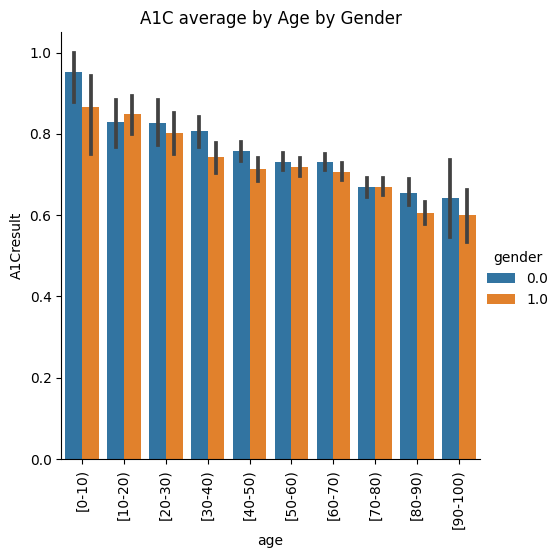

In [ ]:
#Select all observations for which we have A1C test results:
a1c_age_race_df = df_clean[df_clean['A1Cresult'].notnull()]

sns.catplot(data=a1c_age_race_df, x='age', y='A1Cresult', kind='bar', hue='gender', order=['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], width=0.8)
plt.xticks(rotation=90)
plt.title('A1C average by Age by Gender')
plt.show()


4.2- Simple graph#2: The amount of generic medicine, diabetic medicine and their relationships with readmission.

---------------------
[insights]

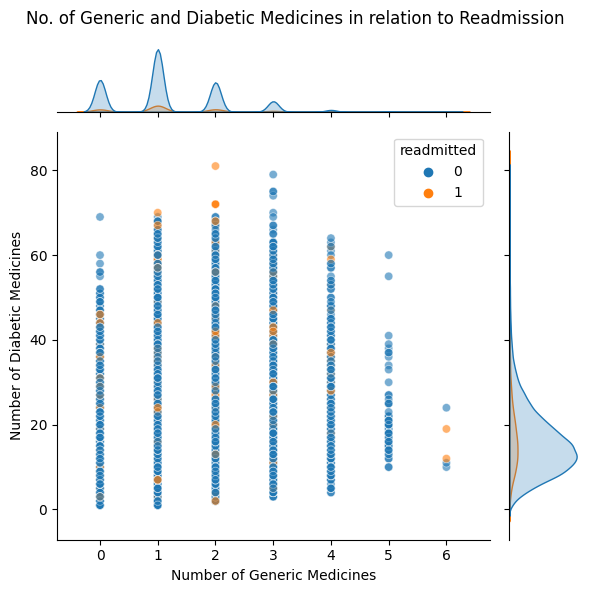

In [54]:
#sns.jointplot(data=df_clean, x='num_diabetic_med', y='num_medications', hue='readmitted', alpha=0.6)
joint_plot = sns.jointplot(data=df_clean, x='num_diabetic_med', y='num_medications', hue='readmitted', alpha=0.6)

joint_plot.set_axis_labels('Number of Generic Medicines', 'Number of Diabetic Medicines')
joint_plot.fig.suptitle('No. of Generic and Diabetic Medicines in relation to Readmission')

plt.tight_layout()
plt.show()

4.2- Simple graph#2: The amount of generic medicine, diabetic medicine and their relationships with readmission.

---------------------
[insights]

Text(0.5, 1.0, 'No. of Generic and Diabetic Medicines in relation to Readmission')

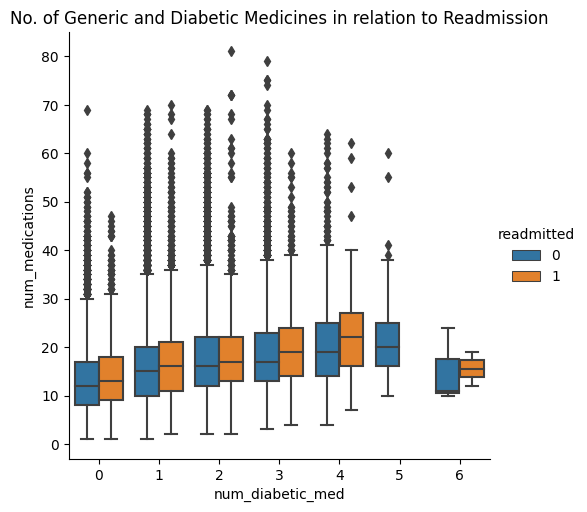

In [55]:
ax= sns.catplot(kind="box",data=df_clean, x='num_diabetic_med', y='num_medications', hue='readmitted')
plt.title('No. of Generic and Diabetic Medicines in relation to Readmission')

4.3  How factors like age, race and gender affect the lenght of stay in the hospital and the eventual readmission?

---
In the graph below, we aim to examine the impact of three variables – age, race, and gender – on the length of hospital stays and readmission rates (represented as [0] = No and [1] = Yes).

As expected, the average time spent in the hospital increases with age. Readmitted patients generally follow this trend, with the exception of the oldest age group (which potentially has a higher mortality rate) and the age group [20-30].

African Americans appear to have the longest hospital stays, while Asians and Hispanics who do not experience readmission tend to have the shortest stays.

Lastly, it's noteworthy that male patients typically have longer hospital stays compared to female patients.

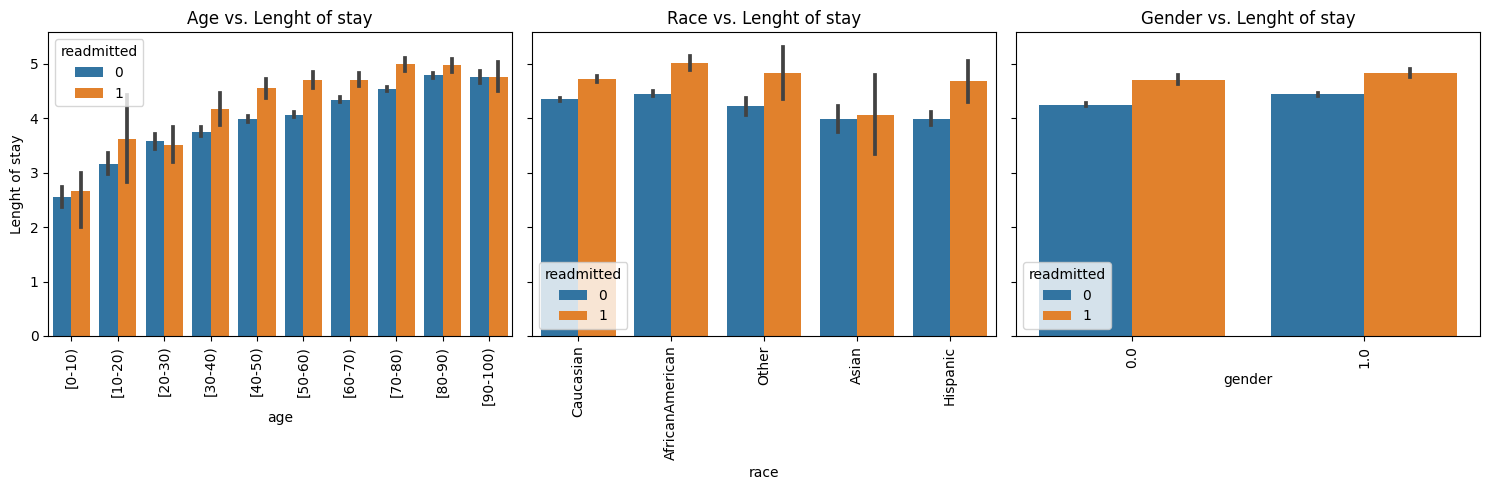

In [ ]:
# Create a figure with three horizontal subplots to visualize how the lenght of stay change based on age, race and gender
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True);

# Create a bar plot for age
sns.barplot(data=df_clean, x='age', y='time_in_hospital', hue='readmitted', ax=axes[0])
plt.sca(axes[0])  #FOR TEAM: Set the current subplot for x-axis tick manipulation
plt.xticks(rotation=90)
axes[0].set_title('Age vs. Lenght of stay')

# Create a bar plot for race
sns.barplot(data=df_clean, x='race', y='time_in_hospital', hue='readmitted', ax=axes[1])
plt.sca(axes[1])
plt.xticks(rotation=90)
axes[1].set_title('Race vs. Lenght of stay')

# Create a bar plot for gender
sns.barplot(data=df_clean, x='gender', y='time_in_hospital', hue='readmitted', ax=axes[2])
plt.sca(axes[2])
plt.xticks(rotation=90)
axes[2].set_title('Gender vs. Lenght of stay')

# Delete single y label and set a common Y-axis label
for ax in axes:
    ax.set_ylabel('')
axes[0].set_ylabel('Lenght of stay')

plt.tight_layout()
plt.show()

4.5 Does being on diabetic medicines affect readmission rate?

---
IIn the graph below, we can observe that the percentage of people readmitted to the hospital is higher for those who are on diabetic medication, as indicated by the label [1]

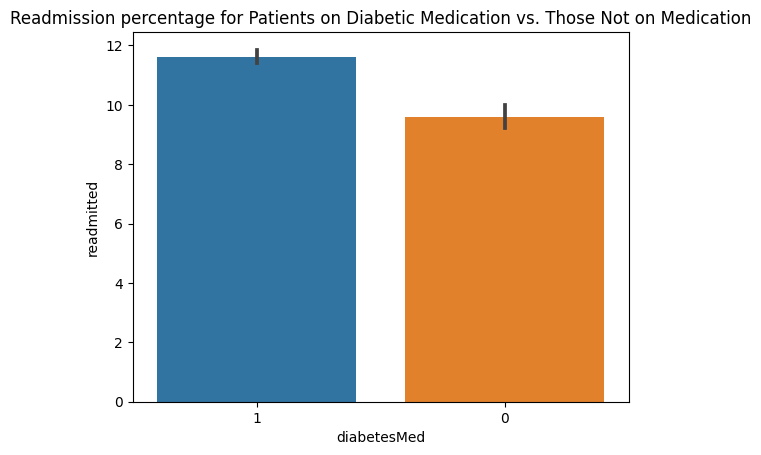

In [ ]:
#barplot( x=key_diebetic_med_users, y= re-admission)
sns.barplot(data=df_clean, x='diabetesMed', y ='readmitted', estimator = lambda x: sum(x) / len(x) * 100, order=[1,0])
plt.title('Readmission percentage for Patients on Diabetic Medication vs. Those Not on Medication')
plt.show()